In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
cc = pd.read_csv('creditcard.csv')

## Visualising Data

In [3]:
cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
cc.shape

(284807, 31)

In [5]:
cc['Class'].value_counts()
# 492 fraudulant cases
# 284315 non-fraudulant cases

0    284315
1       492
Name: Class, dtype: int64

### Fraudulants vs Time and Amount

C:\Users\jwcn9\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


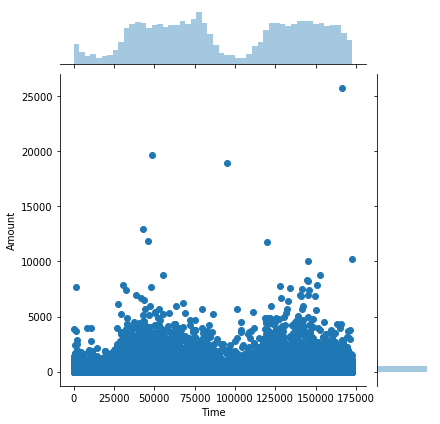

In [6]:
sns.jointplot(x='Time', y='Amount', data=cc)

### Fraudulant vs PCA

In [12]:
ccv = cc.iloc[:,1:29]

C:\Users\jwcn9\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


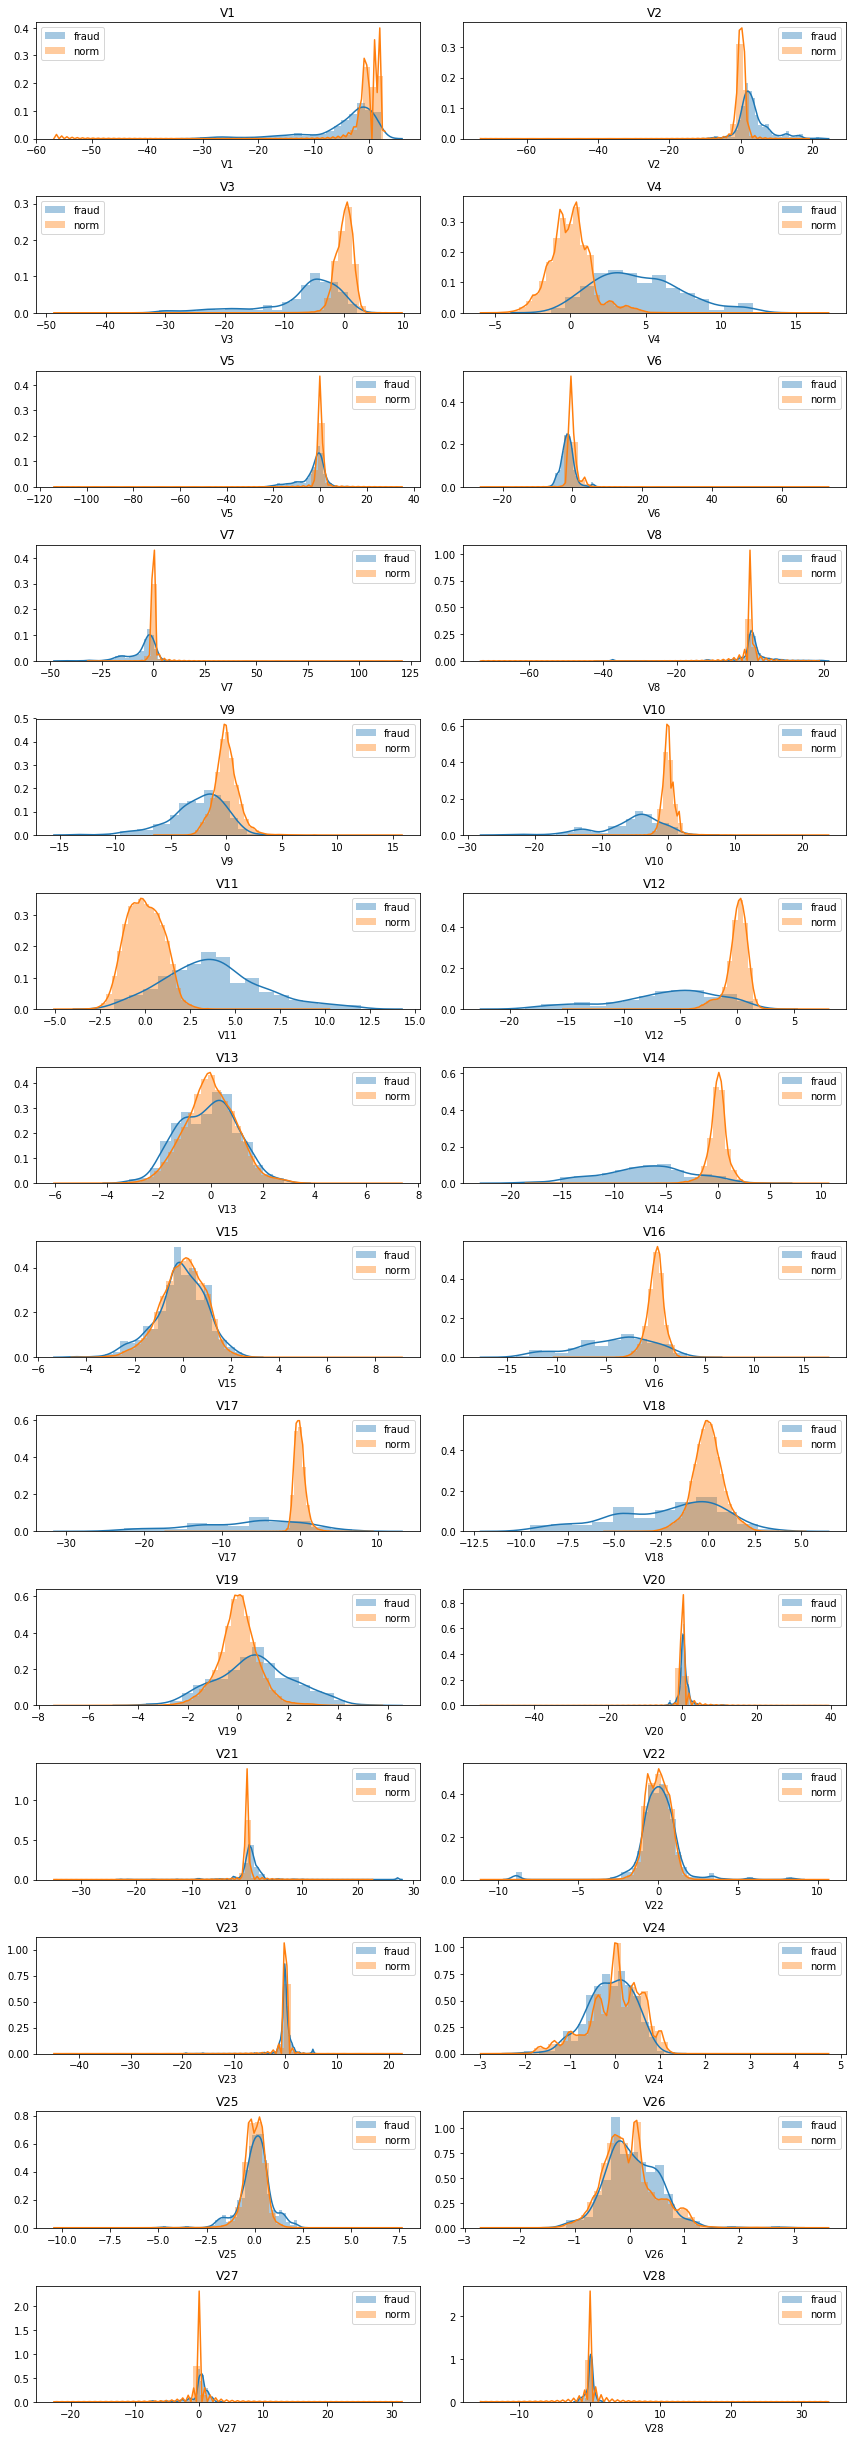

In [11]:
# plot histograms:
# check if there is any distinct difference in fraud cases, relative to each principal component

fig,ax = plt.subplots(nrows=14, ncols=2, figsize=(12,34))

for index in np.arange(ccv.shape[1]):
    axis = ax[int(np.floor(index/2))][index%2]
    sns.distplot(ccv.iloc[:,index][cc['Class']==1], ax=axis, label='fraud')
    sns.distplot(ccv.iloc[:,index][cc['Class']==0], ax=axis, label='norm')
    axis.set_title('V'+str(index+1))
    axis.legend()
    
fig.tight_layout()

### Using KNN Model

In [14]:
X = cc.drop(['Time','Amount','Class'],axis=1)
y = cc['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
predictions = knn.predict(X_test)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.93      0.81      0.87       144

avg / total       1.00      1.00      1.00     85443



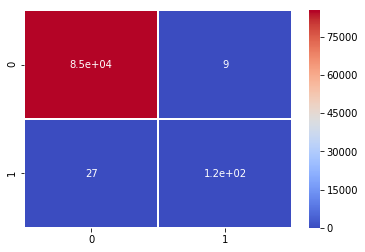

In [21]:
print(classification_report(y_test,predictions))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap='coolwarm', linewidths=1)